In [1]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
def select_column(column_name: str) -> pd.DataFrame:
    # Connect to the SQLite database
    conn = sqlite3.connect('/work/cse-zhousc/resilient_compute/resilience_test/taiyi/analysis/example.db')

    # Query to extract relevant records
    query = f"""
    SELECT failure_type, failure_rate_set, {column_name}, resilience 
    FROM workflow 
    WHERE {column_name} IS NOT NULL
    AND workflow IS 'cholesky'
    AND node_cnt IS 2;
    """

    # Load data into a DataFrame
    df = pd.read_sql_query(query, conn)
    df = df.sort_values(by=['failure_type'])

    # Close the database connection
    conn.close()

    return df


In [12]:
def draw_df(column_name: str, df: pd.DataFrame):
    # Calculate normalized makespan
    def calculate_normalized_makespan(group):
        avg_makespan_1 = group[group['resilience'] == 1][column_name].mean()
        avg_makespan_0 = group[group['resilience'] == 0][column_name].mean()
        return avg_makespan_1 / avg_makespan_0
    
    sns.set_palette("pastel")
    
    # Filter out 'manager-killed' failure type
    df = df[df['failure_type'] != 'manager-killed']

    normalized_df = df.groupby(['failure_type', 'failure_rate_set']).apply(calculate_normalized_makespan).reset_index()
    normalized_df.columns = ['failure_type', 'failure_rate_set', f'normalized_{column_name}']

    # Set up the plot
    plt.figure(figsize=(6, 3))
    sns.set_style("whitegrid")

    # Create the grouped bar plot
    # ax = sns.barplot(x='failure_type', y=f'normalized_{column_name}', hue='workflow', data=normalized_df)

    # Create line chart
    ax = sns.lineplot(x='failure_rate_set', y=f'normalized_{column_name}', hue='failure_type', data=normalized_df, marker='o')

    # Add a horizontal line at y=1
    plt.axhline(y=1, color='red', linestyle='--')
    ax.set_ylim(0, 2)

    # Customize the plot
    # plt.title(f'Normalized {column_name} of Resilience Module by Failure Type and Workflow', fontsize=16)
    plt.xlabel('Failure Rate', fontsize=12)
    plt.ylabel(f'Normalized {column_name}', fontsize=12)
    plt.legend(title='Failure Type', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')


    # Adjust layout and display the plot
    plt.tight_layout()
    plt.savefig(f'/work/cse-zhousc/resilient_compute/resilience_test/taiyi/analysis/img/rate_{column_name}.pdf')
    plt.show()

In [4]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns

# def draw_df(column_name: str, df: pd.DataFrame):
#     # Check if DataFrame is empty
#     if df.empty:
#         print("No records found.")
#     else:
#         # Aggregate data: calculate mean and stderr for each group
#         df_agg = df.groupby(['failure_rate_set', 'failure_type', 'resilience'])[column_name].agg(['mean', 'sem']).reset_index()
#         df_agg.columns = ['failure_rate_set', 'failure_type', 'resilience', 'mean', 'stderr']

#         # Set the style for the plot
#         plt.style.use('seaborn-v0_8-whitegrid')
        
#         # Create a figure for plotting
#         plt.figure(figsize=(12, 8))

#         # Define markers for different failure types
#         markers = {
#             "dependency": 'o',
#             "failure": 'x',
#             "import": 's',
#             "manager-killed": 'd',
#             "memory": 'v',
#             "ulimit": '^',
#             "worker-killed": 'p',
#             "zero-division": 'h'
#         }
        
#         # Define colors for resilience levels
#         colors = {0: 'tomato', 1: 'royalblue'}

#         # Loop through each unique combination of failure type and resilience
#         for failure_type in df_agg['failure_type'].unique():
#             for resilience in df_agg['resilience'].unique():
#                 subset = df_agg[(df_agg['failure_type'] == failure_type) & (df_agg['resilience'] == resilience)]
                
#                 # Sort the subset by failure_rate_set to ensure correct line plotting
#                 subset = subset.sort_values('failure_rate_set')
                
#                 plt.errorbar(subset['failure_rate_set'], subset['mean'], yerr=subset['stderr'],
#                              marker=markers[failure_type], 
#                              color=colors[resilience],
#                              linestyle='-' if resilience == 1 else '--',
#                              label=f'{failure_type}, Resilience={resilience}', capsize=5)

#         # Adding titles and labels
#         plt.title(f'{column_name} vs Set Failure Rate', fontsize=16)
#         plt.xlabel('Set Failure Rate', fontsize=14)
#         plt.ylabel(column_name, fontsize=14)
        
#         # Creating a legend
#         plt.legend(title='Failure Type, Resilience', bbox_to_anchor=(1.05, 1), loc='upper left')
        
#         plt.grid(True, alpha=0.3)
        
#         # Show the plot
#         plt.tight_layout()
#         plt.show()

# # Example usage
# # df = pd.read_csv('your_data.csv')  # Load your data into a DataFrame
# # draw_df('makespan', df)

In [5]:
def draw_column(column_name: str):
    df = select_column(column_name)
    draw_df(column_name, df)

/tmp/ipykernel_118657/386976176.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  normalized_df = df.groupby(['failure_type', 'failure_rate_set']).apply(calculate_normalized_makespan).reset_index()


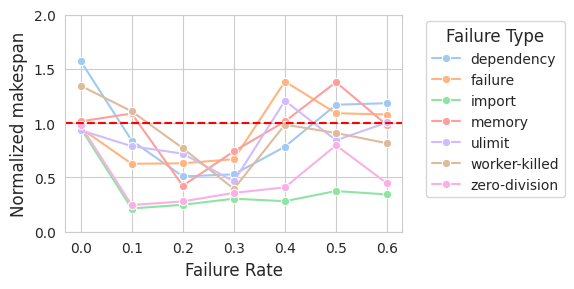

In [13]:
draw_column('makespan')

/tmp/ipykernel_118657/386976176.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  normalized_df = df.groupby(['failure_type', 'failure_rate_set']).apply(calculate_normalized_makespan).reset_index()


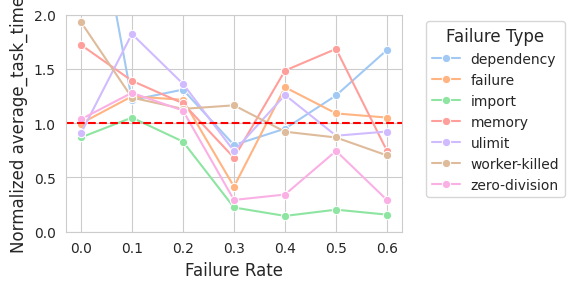

/tmp/ipykernel_118657/386976176.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  normalized_df = df.groupby(['failure_type', 'failure_rate_set']).apply(calculate_normalized_makespan).reset_index()


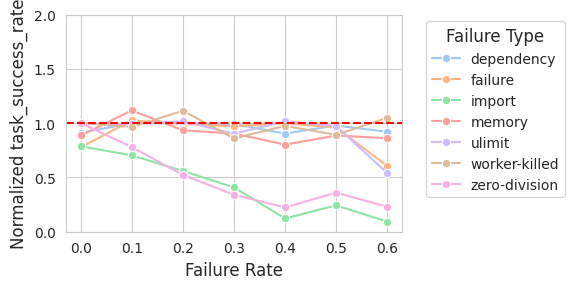

/tmp/ipykernel_118657/386976176.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return avg_makespan_1 / avg_makespan_0
/tmp/ipykernel_118657/386976176.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  normalized_df = df.groupby(['failure_type', 'failure_rate_set']).apply(calculate_normalized_makespan).reset_index()


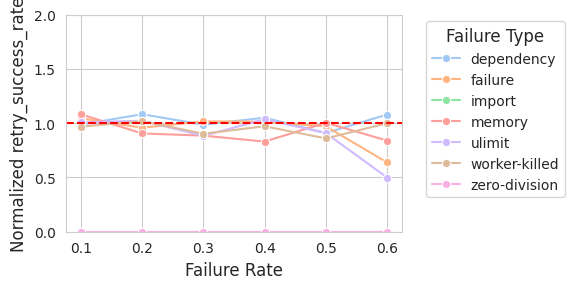

In [14]:
draw_column('average_task_time')
draw_column('task_success_rate')
draw_column('retry_success_rate')

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def draw_overhead(column_name: str, df: pd.DataFrame):
    sns.set_palette("pastel")
    
    # Filter out 'manager-killed' failure type and resilience != 0
    df = df[df['failure_type'] != 'manager-killed']
    df = df[df['resilience'] != 0]

    # Group by 'failure_type' and 'failure_rate_set', and calculate mean and stderr
    normalized_df = df.groupby(['failure_type', 'failure_rate_set'])[column_name].agg(['mean', 'sem']).reset_index()
    normalized_df.columns = ['failure_type', 'failure_rate_set', f'{column_name}_mean', f'{column_name}_stderr']

    # Set up the plot
    plt.figure(figsize=(6, 3))
    sns.set_style("whitegrid")

    # Create line chart with error bars
    ax = sns.lineplot(x='failure_rate_set', y=f'{column_name}_mean', hue='failure_type', data=normalized_df, marker='o')

    # Get the colors used by seaborn
    palette = sns.color_palette("pastel", len(normalized_df['failure_type'].unique()))
    color_dict = {ftype: palette[i] for i, ftype in enumerate(normalized_df['failure_type'].unique())}

    # Add error bars manually with the same color as the lines
    for i, row in normalized_df.iterrows():
        plt.errorbar(x=row['failure_rate_set'], y=row[f'{column_name}_mean'], yerr=row[f'{column_name}_stderr'], 
                     fmt='none', c=color_dict[row['failure_type']], capsize=5)

    # Customize the plot
    plt.xlabel('Failure Rate', fontsize=12)
    plt.ylabel(f'Overhead (s)', fontsize=12)
    plt.legend(title='Failure Type', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.savefig(f'/work/cse-zhousc/resilient_compute/resilience_test/taiyi/analysis/img/rate_{column_name}.pdf')
    plt.show()

# Example usage
# df = pd.read_csv('your_data.csv')  # Load your data into a DataFrame
# draw_overhead('makespan', df)

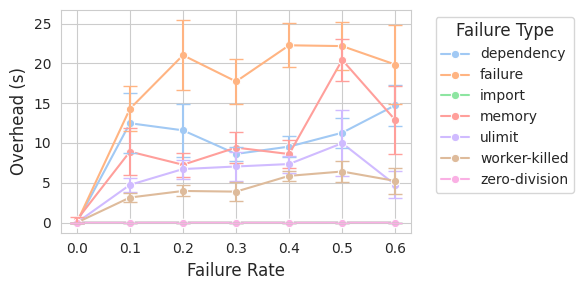

In [20]:
df = select_column('overhead')
draw_overhead('overhead', df)

In [17]:
conn = sqlite3.connect('/work/cse-zhousc/resilient_compute/resilience_test/taiyi/analysis/example.db')

# Query to extract relevant records
query = f"""
SELECT failure_type, failure_rate_set, overhead, makespan, task_count, overhead/makespan*100 AS percentage, overhead/task_count AS overhead_per_task, resilience 
FROM workflow 
WHERE overhead IS NOT NULL
AND makespan IS NOT NULL
AND workflow IS 'cholesky'
AND node_cnt IS 2;
"""

# Load data into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()


df = df[df['failure_type'] != 'manager-killed']
df = df[df['resilience'] == 1]

df

,failure_type,failure_rate_set,overhead,makespan,task_count,percentage,overhead_per_task,resilience
1,memory,0.3,13.487,177.684009,100,7.590441,0.13487,1
2,zero-division,0.3,0.000,12.640004,100,0.000000,0.00000,1
4,worker-killed,0.3,4.904,156.426027,100,3.135028,0.04904,1
5,dependency,0.3,11.348,51.839992,200,21.890435,0.05674,1
7,worker-killed,0.3,2.978,127.447025,100,2.336657,0.02978,1
...,...,...,...,...,...,...,...,...
734,worker-killed,0.0,0.000,153.344008,385,0.000000,0.00000,1
735,import,0.5,0.039,31.984980,100,0.121932,0.00039,1
736,import,0.2,0.007,42.185006,100,0.016594,0.00007,1
737,import,0.1,0.003,39.251004,100,0.007643,0.00003,1


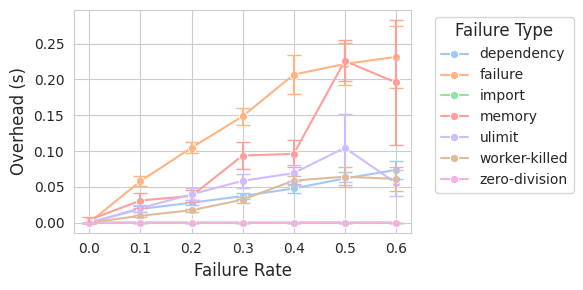

In [18]:
draw_overhead("overhead_per_task", df)